<center>
    <img src="https://cds.cern.ch/record/1306150/files/cmsLogo_image.jpg" width="300" alt="cognitiveclass.ai logo"  />
    
</center>

# Pile Up Study at the CMS experiment in 2018

### importing libraries and classes


In [1]:
from __future__ import annotations
import uproot
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import plotly
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from typing import overload
from abc import ABC, abstractmethod
import sympy
from sympy.integrals.transforms import laplace_transform
import random
import math
from tqdm.auto import tqdm, trange
from concurrent.futures import ThreadPoolExecutor
import scipy.stats as stats
from scipy.optimize import curve_fit


from Class1 import parametricValue

    
from Class1 import fixedValue


from Class1 import parametricValueNumpy


from Class1 import parametricValueSympy


#these are important for me

from Class1 import binning


from Class1 import discretepdf


from Class1 import NLL


from Class1 import lumiDist


from Class1 import lumiDistSympyLaplace


from Class1 import lumiDistNumpy


from Class1 import SimulationVSPu


In [2]:
from Class1 import RunInfo


## choosing Runs and Eras

In [3]:
from allInfo import GetAllRuns, GetAllEras

year =2018
GetAllEras(year)

['1', 'B', '5', 'A']

In [4]:
year =2018
eras = ['A' , 'B']
# for era in GetAllEras(year):
for era in eras:
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
    print(era, ':' , allRuns)

A : [315257, 315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315721, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 315974, 316058, 316059, 316060, 316061, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995]
B : [317080, 317087, 317089, 317182, 317212, 317213, 317279

In [5]:
A_allRuns = sorted( list(set( GetAllRuns(2018 , 'A') ) ) )
B_allRuns = sorted( list(set( GetAllRuns(2018 , 'B') ) ) )
print('era A has {0} runs'.format(len(A_allRuns)))
print('era B has {0} runs'.format(len(B_allRuns)))

era A has 117 runs
era B has 43 runs


In [6]:
year , era = 2018 , 'A'
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
allRuns = allRuns[22:24]
allRuns

[315557, 315640]

In [7]:
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
Runs = allRuns[23:28]
if len(Runs) == 1:
    ind = allRuns.index(Runs[0])
    runName = 'RunNo:{0}'.format(ind+1)
else:
    runName = 'nRuns={0}'.format(len(Runs))
runName

'nRuns=5'

## Run Cell

In [8]:
web1 = '/eos/user/c/cmstandi/SWAN_projects/Nima/PUFit' # source directory
web2 = '/eos/user/c/cmstandi/www/PU/newres/New' # publish directory

#Experiment Number:
expN = 3 # change this every time you want to run new feature. 

from pathlib import Path

import sys
sys.path.append('../nTuplizer')

from allInfo import GetAllRuns, GetAllEras

def export_graph(g , n , pname, pdir):
    ghtml = g.to_html()
    Path('{0}/{1}/'.format(pdir , pname) ).mkdir(parents=True, exist_ok=True)
    with open('{0}/{1}/{2}.html'.format(pdir , pname , n) , 'w') as f:
        f.write(ghtml)
def publish_res(rinfo , gchi2 , vname ,  name , publish_dir):

    
    
    
    gg = rinfo.plot_lumi_distribution(subRuns=-1 , colorLumiScale=4 , density=False)
    
    # updated plot layout in Class1
#     gg.update_layout(
#         title="Distribution of BX luminosity",
#         xaxis_title='luminosity (1/mb 1/25ns)',
#         yaxis_title="probability",
#         legend_title="Runs",
#     )
    export_graph(gg , '01-lumi_distribution' , name , publish_dir)
    
    
    
    
    #02-pu_distribution
    
    gg = rinfo.plotPUDists(70)
    export_graph(gg , '02-pu_distribution' , name , publish_dir)
    
    
    
    
    
    #03-{vname}_distribution:
    
    if rinfo.parentRun is None:
        gg = rinfo.plotDataDist(zoom=True)
        export_graph(gg , '03-{0}_distribution'.format(vname) , name , publish_dir) 

    
    
    
    #04-{vname}_predictions:

    gg = rinfo.plotPredictions([60,65,75,80,90])
    export_graph(gg , '04-{0}_predictions'.format(vname) , name , publish_dir)
    
        
        
        
        
    for _xsec in [60,65,75,80,90]:
        gg = rinfo.plotRunPredictions(_xsec)
        export_graph(gg , '05-{0}_predictions_xsec{1}'.format(vname , _xsec) , name , publish_dir)
            
    
    
    export_graph(gchi2 , '06-bestfit_details'  , name , publish_dir)
    export_graph(rinfo.postFitPlots(), '07-postFit_plots'  , name , publish_dir)
    export_graph(rinfo.pullPlots(50 , 1.3) , '08-pullPlots' , name , publish_dir)
    export_graph(rinfo.NadjiehPullPlots(50 , 1.3) , '08-NadjiehPullPlots' , name , publish_dir)
    
    
    
    
    
    if rinfo.parentRun is None:
        export_graph(rinfo.aggregateFitRes() , '09-summary1' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes2() , '09-summary2' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes3() , '09-summary3' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes4() , '09-summary4' , name ,publish_dir)
        
        
   
rinfo = None
        
def process_and_publish(year , era , vname , vmin , vmax , vnbins , pu_max ,
                        lumiName = 'PHYSICSDel' , 
#                         lumiQ =  np.array([0,0.2,0.6,1.0]) ,
                        lumiQ =  np.array([0,0.1,0.9,1.0]) ,
                        lnbins_per_q = 100 ,
                        xsec = np.arange(30,100,1), nthreads = 30 , publish_dir = web2 ):
    nbins = lumiQ.size -1
  #  print(nbins)  
    
    #Runs
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
    Runs = allRuns[:]
    if len(Runs) == 1:
        ind = allRuns.index(Runs[0])
        runName = 'RunNo:{0}'.format(ind+1)
    else:
        runName = 'nRuns={0}'.format(len(Runs))
    runName
    
    
    
    head = 'expe={0}_{1}{2}_nLumiBins={3}_{4}'.format(expN,era, year,nbins , runName)
    name = '{0}/{1}'.format(head, vname)
    
    
    #00simulation plot:
    
    var_bins = np.linspace(vmin,vmax,vnbins+1)
    simDist = SimulationVSPu(vname , year = year , var_bins=var_bins , pu_max=pu_max , nthreads=nthreads)


    g = simDist.plot(param=1 , label = 'PU = 1')
    for i in range(10,90+1,10):
        theName = 'PU = {0}'.format(i)
        simDist.plot(param=i , g=g , 
                     scatterOpts={ 'name':theName}
                    )

    g.update_layout(
        title="Simulated distribution for PU ",
        xaxis_title= vname,
        yaxis_title="probability",
        legend_title="PU number",
    )    
    export_graph(g , '00-Simulation' , name , publish_dir )
    
    
    
    

    
    
    
    print('is going to run over {0} runs'.format( len(Runs)) )
    print('Number of Lumi Bins = {0}'.format(nbins))

    
    rinfo = RunInfo(0 , vname , var_bins , lumiName ,lumiQ , nbins_perq=lnbins_per_q , sub_runs=Runs , 
                    nthreads=nthreads , xsecs = xsec)
    
    rinfo.setSimulation(simDist)
    gchi2 = rinfo.fit()
    
#     print(vname)
#     print(var_bins)
#     print(lumiName)
#     print(lumiQ)
#     print(lnbins_per_q)
    
    try:
        
        publish_res(rinfo , gchi2 , vname , name , publish_dir)
        for sr in rinfo._subRuns : #+ rinfo._subRunsSameLumiBins:
            #ext = '/SRSimilarBinning' if sr._isSecondHand else '/SRSameBinning'
            publish_res(sr , None , vname , vname , '{0}/{1}/Runs/Run{2}'.format(publish_dir , head , sr.run) )
    except Exception as e:
        print(e)
        return head, rinfo

    #del rinfo
    #del simDist
    

    return head, rinfo
 

    

In [9]:
variables = { 
              "nVertices" : ( "nVertices" , 90 , 0 , 90 ) ,
              "nGoodVertices" : ("nGoodVertices", 80, 0 , 80) ,
              "nEles" : ("nEles" , 10 , 0 , 10 ) ,
              "nMus" : ("nMus" , 10 , 0 , 10 ),
              "nChargedHadrons" : ("nChargedHadrons" , 120 , 0 , 1200 ),
              "nLostTracks": ("nLostTracks" , 35 , 0 , 35 ),
              "nPhotons" : ("nPhotons" , 120 , 0 , 600 ),
              "nNeutralHadrons" : ("nNeutralHadrons" , 60 , 0 , 120 ),
              "fixedGridRhoAll" : ("fixedGridRhoAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAll" : ("fixedGridRhoFastjetAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAllCalo" : ("fixedGridRhoFastjetAllCalo" , 25 , 0 , 25 ),
              "fixedGridRhoFastjetCentral" : ("fixedGridRhoFastjetCentral" , 50 , 0 , 50 ),
              "fixedGridRhoFastjetCentralCalo" : ("fixedGridRhoFastjetCentralCalo" , 20 , 0 , 20 ),
              "fixedGridRhoFastjetCentralChargedPileUp" : ("fixedGridRhoFastjetCentralChargedPileUp" , 35 , 0 , 35 ),
              "fixedGridRhoFastjetCentralNeutral" : ("fixedGridRhoFastjetCentralNeutral" , 12 , 0 , 12 )
            }

vvv = {}
year , era = 2018 , 'B'
for v,vinfo in variables.items():
     head , vvv[v]  = process_and_publish(year , era , vinfo[0] , vinfo[2] , vinfo[3] , vinfo[1] , 90  )
        

  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:01<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:03<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 43 runs
Number of Lumi Bins = 3


  0%|          | 0/95 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/9 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/89 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317488]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317340]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317087]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317291]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317484]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317478]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317391]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317383]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317591]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317212]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317339]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317292]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317338]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317297]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317089]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 319077]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317279]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317626]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317435]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317641]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317392]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317320]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317182]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317475]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318874]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317663]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317696]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318877]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318872]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317649]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317640]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317650]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 317661]

  0%|          | 0/3 [00:00<?, ?it/s, RUN 318828]

  0%|          | 0/87 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


## name of this Experiment: uses in naming folders

In [10]:
head

'expe=3_B2018_nLumiBins=3_nRuns=43'

## making directories for overviewPlots both in source and publish directories

In [11]:
# overview for publishL
import os

directory = "{0}/overview".format(head)
  
# Parent Directory path
parent_dir = web2
  
# Path
path = os.path.join(parent_dir, directory)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

In [12]:
#overviewPlots for source
import os

directory1 = 'overviewPlots/{0}'.format(head)
  
# Parent Directory path
parent_dir1 = web1
  
# Path
path = os.path.join(parent_dir1, directory1)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

## Luminosity and PileUp dists:

In [13]:
def export_Graph(g , n , pdir):
    ghtml = g.to_html()
    Path('{0}/'.format(pdir ) )
    with open('{0}/{1}.html'.format(pdir , n) , 'w') as f:
        f.write(ghtml)

In [14]:
G = vvv['nVertices'].lumi_distribution.plot()
export_Graph(G , 'LumiDist', '{0}/{1}/'.format(parent_dir,directory))
G


In [15]:
G = vvv['nVertices'].plot_lumi_distribution()
export_Graph(G , 'LumiDistMain', '{0}/{1}/'.format(parent_dir,directory))
G


In [16]:
xsec = 70
G = vvv['nVertices'].plotPUDists(xsec)
# vvv['nVertices'].plotDataDist()

export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir,directory))
# export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir1,directory1))

G

## Creating overview plot for all lumi bins:

15
3


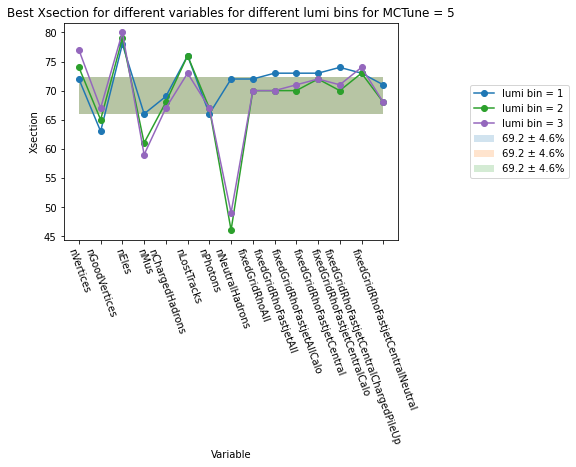

In [17]:
#total plots export

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)
for key in vvv:
    for i in range(vvv[key].nLumiBins):
#         print(i)
        if i == 20 - 1:
            print(i)
print(vvv[key].nLumiBins)
for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for different lumi bins for MCTune = 5")

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, '-')
    plt.fill_between(names, y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )

    plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
#     plt.show()
    plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight')   # save the figure to file
    plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight')   # save the figure to file

    #     plt.close(fig)
    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


## Creating overview plot for each lumi bins:

15


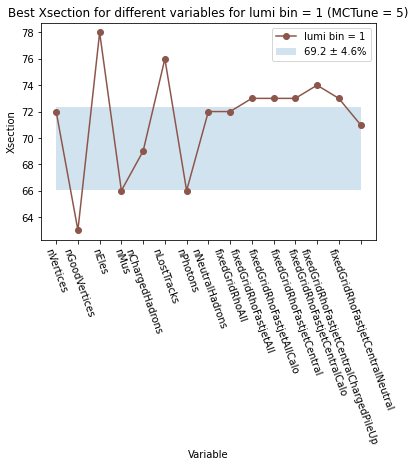

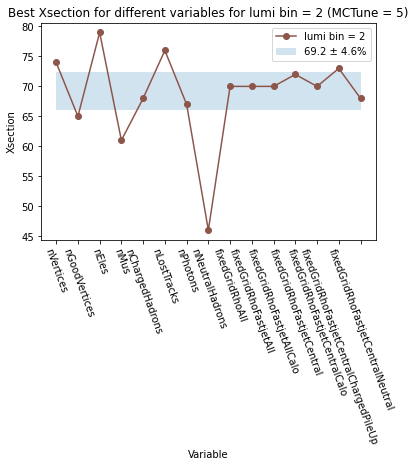

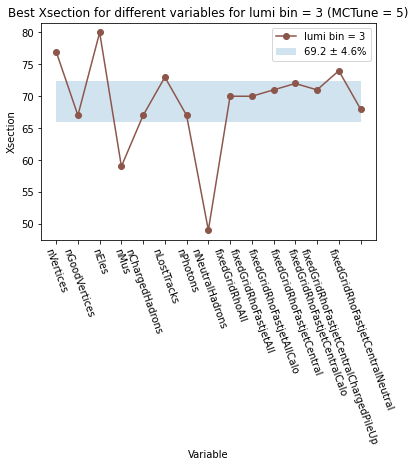

In [18]:
#plot for each lumi bin

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , color='tab:brown' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for lumi bin = {0} (MCTune = 5)".format(i+1))

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, '-')
    plt.fill_between(names, y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )

    plt.legend()
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir,directory,i+1) , dpi=300, bbox_inches='tight')
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir1,directory1,i+1) , dpi=300, bbox_inches='tight')   # save the figure to file

    plt.show()

    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


15


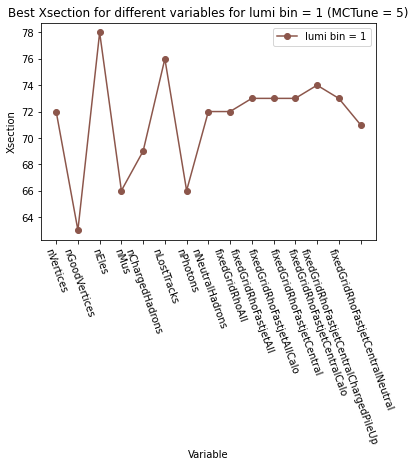

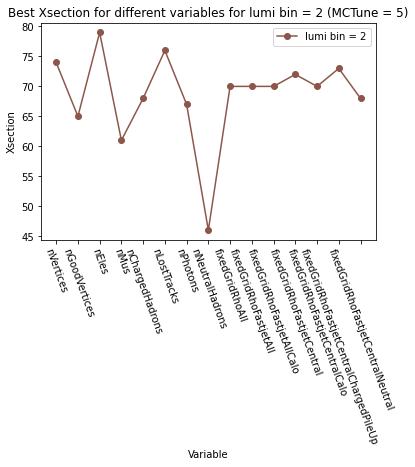

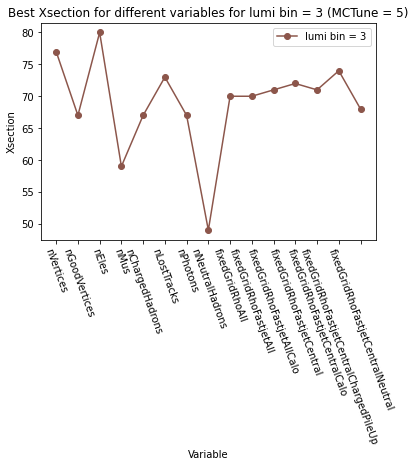

In [19]:
#plot for each lumi bin

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , color='tab:brown' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for lumi bin = {0} (MCTune = 5)".format(i+1))



    plt.legend()
#     plt.savefig('/eos/user/c/cmstandi/www/PU/newres/data2/5/plot for lumi = {}.png'.format(i+1) , dpi=300, bbox_inches='tight')
    plt.show()

    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []


## Fit Quality for all variables:

In [ ]:
#fit quality

keys = []
fits = []
dicts = {}
for key in vvv: 
    keys.append(vvv[key].vname)
    datalist =(vvv[key].data_hists[0].allProbs())/(vvv[key].data_hists[0].integral())
    prelist = vvv[key].predictions[0].allProbs()
    n = 0
    for i in range(len(datalist)):
    #     print(datalist[i])
    #     print(prelist[i])
    # #     print('-------')
        if datalist[i] == 0 :
            pass
        else: 
            m = datalist[i] - prelist[i]
            k = m**2
            j = k/datalist[i]
    #         print(j)
            n += j
    #         print(n)
            m = 0
    #         print('-----------')
    fits.append(n)
#     print('fit quality for {0} is: {1}'.format(key , n))
for q in range(len(keys)):
    dicts[keys[q]] = fits[q]
print(dicts)

plt.plot(keys , fits ,'o-' , label='fit quality')
plt.xticks(rotation=70)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

## some features of the code:

In [20]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var: {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var: nVertices in lumi bin = 1 is : 72.0 
best fit for var: nVertices in lumi bin = 2 is : 74.0 
best fit for var: nVertices in lumi bin = 3 is : 77.0 
best fit for var: nGoodVertices in lumi bin = 1 is : 63.0 
best fit for var: nGoodVertices in lumi bin = 2 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 3 is : 67.0 
best fit for var: nEles in lumi bin = 1 is : 78.0 
best fit for var: nEles in lumi bin = 2 is : 79.0 
best fit for var: nEles in lumi bin = 3 is : 80.0 
best fit for var: nMus in lumi bin = 1 is : 66.0 
best fit for var: nMus in lumi bin = 2 is : 61.0 
best fit for var: nMus in lumi bin = 3 is : 59.0 
best fit for var: nChargedHadrons in lumi bin = 1 is : 69.0 
best fit for var: nChargedHadrons in lumi bin = 2 is : 68.0 
best fit for var: nChargedHadrons in lumi bin = 3 is : 67.0 
best fit for var: nLostTracks in lumi bin = 1 is : 76.0 
best fit for var: nLostTracks in lumi bin = 2 is : 76.0 
best fit for var: nLostTracks in lumi bin = 3 is : 73.0 
b

In [21]:
vvv['nVertices'].subRunNumbers


[317080,
 317087,
 317089,
 317182,
 317212,
 317213,
 317279,
 317291,
 317292,
 317297,
 317319,
 317320,
 317338,
 317339,
 317340,
 317382,
 317383,
 317391,
 317392,
 317435,
 317438,
 317475,
 317478,
 317484,
 317488,
 317527,
 317591,
 317626,
 317640,
 317641,
 317648,
 317649,
 317650,
 317661,
 317663,
 317683,
 317696,
 318828,
 318872,
 318874,
 318876,
 318877,
 319077]

In [22]:
for i in  vvv['nVertices']._subRuns:
    x = i.run
    print(x)
print(len(vvv['nVertices']._subRuns))

317383
317391
317478
317382
317212
317475
317338
317080
317339
317438
317319
317591
317340
317292
317213
317297
317640
317291
317488
317087
317484
317089
317279
317527
317435
317182
317641
317392
317626
317320
317648
318828
319077
317649
317650
317663
318874
317683
317661
318872
318876
318877
317696
43


In [23]:
x = vvv['nVertices'].subRunNumbers
print(x)

[317080, 317087, 317089, 317182, 317212, 317213, 317279, 317291, 317292, 317297, 317319, 317320, 317338, 317339, 317340, 317382, 317383, 317391, 317392, 317435, 317438, 317475, 317478, 317484, 317488, 317527, 317591, 317626, 317640, 317641, 317648, 317649, 317650, 317661, 317663, 317683, 317696, 318828, 318872, 318874, 318876, 318877, 319077]


In [24]:

for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 1 is : 72.0 
best fit for var = nVertices in lumi bin = 2 is : 74.0 
best fit for var = nVertices in lumi bin = 3 is : 77.0 
best fit for var = nGoodVertices in lumi bin = 1 is : 63.0 
best fit for var = nGoodVertices in lumi bin = 2 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 67.0 
best fit for var = nEles in lumi bin = 1 is : 78.0 
best fit for var = nEles in lumi bin = 2 is : 79.0 
best fit for var = nEles in lumi bin = 3 is : 80.0 
best fit for var = nMus in lumi bin = 1 is : 66.0 
best fit for var = nMus in lumi bin = 2 is : 61.0 
best fit for var = nMus in lumi bin = 3 is : 59.0 
best fit for var = nChargedHadrons in lumi bin = 1 is : 69.0 
best fit for var = nChargedHadrons in lumi bin = 2 is : 68.0 
best fit for var = nChargedHadrons in lumi bin = 3 is : 67.0 
best fit for var = nLostTracks in lumi bin = 1 is : 76.0 
best fit for var = nLostTracks in lumi bin = 2 is : 76.0 
best fit for var = nLostTracks in lumi bi

In [25]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        if i == 3 - 1:
            print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 3 is : 77.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 67.0 
best fit for var = nEles in lumi bin = 3 is : 80.0 
best fit for var = nMus in lumi bin = 3 is : 59.0 
best fit for var = nChargedHadrons in lumi bin = 3 is : 67.0 
best fit for var = nLostTracks in lumi bin = 3 is : 73.0 
best fit for var = nPhotons in lumi bin = 3 is : 67.0 
best fit for var = nNeutralHadrons in lumi bin = 3 is : 49.0 
best fit for var = fixedGridRhoAll in lumi bin = 3 is : 70.0 
best fit for var = fixedGridRhoFastjetAll in lumi bin = 3 is : 70.0 
best fit for var = fixedGridRhoFastjetAllCalo in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetCentral in lumi bin = 3 is : 72.0 
best fit for var = fixedGridRhoFastjetCentralCalo in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetCentralChargedPileUp in lumi bin = 3 is : 74.0 
best fit for var = fixedGridRhoFastjetCentralNeutral in lumi bin = 3 is : 68.0 


In [26]:
import numpy as np
import matplotlib.pyplot as plt


XsecBest = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)

        
        
        
print(keys)
print(values)

15
['nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nEles', 'nMus', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'nNeutralHadrons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral']
[72

In [27]:
for i in range (vvv['nVertices'].nLumiBins):
    print(vvv['nVertices'].data_hists[i].integral())

3898748.0
31189996.0
3896473.0


In [28]:
vvv['nVertices'].predictions

In [29]:
vvv['nVertices'].plotPredictions([45])

In [30]:
vvv['nVertices'].predictions[0].plot()

In [31]:
 vvv['nVertices'].predictions[0].plot(param=vvv['nVertices'].fitResults[0].bestFit ,
                                    norm=vvv['nVertices'].data_hists[0].integral()
                                    )

In [32]:
vvv['nVertices'].predictions[0].plot(norm=vvv['nVertices'].data_hists[0].integral() ,param=vvv['nVertices'].fitResults[0].bestFit)


In [33]:

prelist = vvv['nVertices'].predictions[0].allProbs()
print(prelist)
print(sum(prelist))

[6.96402837e-03 3.86916241e-02 6.80999175e-02 1.07246845e-01
 1.39328611e-01 1.52252772e-01 1.43542460e-01 1.18926739e-01
 8.81170409e-02 5.93378153e-02 3.63795256e-02 2.06084038e-02
 1.08426757e-02 5.36758289e-03 2.47330181e-03 1.09320040e-03
 4.47573032e-04 1.76390923e-04 6.72490439e-05 2.40726921e-05
 8.13172402e-06 2.73898821e-06 8.99215606e-07 2.85617451e-07
 7.95446286e-08 2.55298983e-08 6.50356426e-09 2.81940486e-09
 4.46920567e-10 1.10779926e-10 4.15029569e-11 9.49492400e-12
 2.20516521e-12 8.14666972e-13 9.58252592e-14 7.45231664e-14
 6.12580043e-15 1.12264785e-15 2.37506577e-16 3.69620131e-15
 3.58763355e-17 3.20917465e-18 1.33271729e-18 8.66425773e-19
 1.83678987e-19 3.14070644e-19 3.68538198e-20 5.41683490e-22
 7.86451762e-22 5.98097083e-22 1.45316174e-21 4.65125474e-23
 1.01587406e-23 2.63906112e-24 1.90745377e-24 3.17283907e-25
 5.36614322e-25 1.43020764e-24 1.94225072e-26 1.92452119e-27
 1.58837978e-27 8.63070308e-27 2.78913564e-28 2.10680735e-29
 6.88967080e-30 6.939210

In [34]:
vvv['nVertices'].data_hists[0].plot()


In [35]:
datalist =(vvv['nVertices'].data_hists[0].allProbs())/(vvv['nVertices'].data_hists[0].integral())
print(datalist)
print(sum(datalist))

[0.00000000e+00 6.78089479e-03 9.14832146e-03 1.04328364e-02
 1.21264570e-02 1.58951027e-02 2.23715408e-02 3.20541364e-02
 4.48931298e-02 5.87768176e-02 7.22629418e-02 8.32274874e-02
 9.00299276e-02 9.15824772e-02 8.80028666e-02 8.04442862e-02
 6.96913471e-02 5.74086861e-02 4.52624791e-02 3.42956252e-02
 2.48466944e-02 1.71483256e-02 1.15916699e-02 7.60372304e-03
 4.84719710e-03 2.99506406e-03 1.83084416e-03 1.13241482e-03
 7.02533223e-04 4.56043838e-04 3.08817087e-04 2.24944008e-04
 1.93908403e-04 1.50561155e-04 1.35941076e-04 1.15934654e-04
 1.17473609e-04 9.61847239e-05 9.10548720e-05 7.48958384e-05
 7.64347939e-05 7.20744198e-05 5.97627751e-05 5.12985194e-05
 4.59121749e-05 5.18115046e-05 3.64219488e-05 3.51394858e-05
 3.00096339e-05 2.59057523e-05 2.64187375e-05 1.97499300e-05
 1.87239596e-05 1.28246299e-05 9.49022609e-06 1.10291817e-05
 9.49022609e-06 8.46425570e-06 5.64283714e-06 4.61686675e-06
 3.84738896e-06 3.07791117e-06 3.07791117e-06 3.07791117e-06
 3.07791117e-06 2.308433

In [36]:
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = datalist[i] - prelist[i]
        k = m**2
        j = k/datalist[i]
#         print(j)
        n += j
#         print(n)
        m = 0
#         print('-----------')
print(n/len(datalist))

0.061372753923455876


In [37]:
import math 
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = prelist[i] - datalist[i]
#         j = m/math.sqrt(datalist[i])
        j = m/math.sqrt(datalist[i])
        n += j
        m = 0
print(n)

2.341026601931787


In [38]:
 vvv['nVertices']._subRunsSameLumiBins[0].fitResults

[data: nVertices_run317391_lumi1 best fit: 99.0 +- -1,
 data: nVertices_run317391_lumi2 best fit: 77.0 +- 1.0,
 data: nVertices_run317391_lumi3 best fit: 78.0 +- 1.0]

In [39]:
vvv['nVertices'].fitResults[0].plot()

In [40]:
vvv['nVertices'].predictions[0].plot()

In [41]:
vvv['nVertices'].data_hists[0].plot()

In [42]:
print(vvv['nVertices'].nLumiBins)

3


In [43]:
vvv['nVertices'].fitResults

[data: nVertices_run0_lumi1 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi2 best fit: 74.0 +- 1.0,
 data: nVertices_run0_lumi3 best fit: 77.0 +- 1.0]

In [44]:
simDist = SimulationVSPu('nPhotons' , year = 2018 , var_bins= np.linspace(0,100,101) , pu_max=100 , nthreads=30)

  0%|          | 0/102 [00:00<?, ?it/s, SIMULATION]

In [45]:
aa = simDist.plotEfficiencies()
aa.plot()

In [46]:
for key in variables.keys():
    print('vName: {0}'.format(key))

vName: nVertices
vName: nGoodVertices
vName: nEles
vName: nMus
vName: nChargedHadrons
vName: nLostTracks
vName: nPhotons
vName: nNeutralHadrons
vName: fixedGridRhoAll
vName: fixedGridRhoFastjetAll
vName: fixedGridRhoFastjetAllCalo
vName: fixedGridRhoFastjetCentral
vName: fixedGridRhoFastjetCentralCalo
vName: fixedGridRhoFastjetCentralChargedPileUp
vName: fixedGridRhoFastjetCentralNeutral


In [47]:
MC = SimulationVSPu.mctune
print(MC)

In [48]:
# گرفتن انتگرال pu dist

# bina = binning(1 , 2 , 1.5 )
# binb = binning(2 , 3 , 2.5)
# binc = binning(3, 4 , 3.5)
# lumidist = lumiDistNumpy('testlumi' , {bina: 0.33 , binb: 0.33 , binc: 0.33 #lumi bin prob
#                                       }, 50 , np.array([1,2,2.5] # pu max and cross section for each bin 
#                                                       ))
# g = lumidist.PUDist.plot(param = 1)

# lumidist.PUDist.plot(param = 2 , g=g )
# lumidist.PUDist.plot(param = 3 , g=g )


# g.update_layout(
#         title="PU dist ",
#         xaxis_title= 'PU',
#         yaxis_title="probability",
#         legend_title="PU number",
#     )
# g

In [49]:
# bina.representative

In [50]:
# counter = 0
# for b,v in lumidist.PUDist.vals:
#     counter +=1
#     print(b,v)
# print(counter)